# Intro Python - Pandas

- [Pandas](https://pandas.pydata.org/)
- [Getting Started](https://pandas.pydata.org/docs/getting_started/index.html)

In [1]:
import pandas as pd
import numpy as np

## Estructuras de datos
### [Series](https://pandas.pydata.org/docs/user_guide/dsintro.html#series)
Una __Series__ es un objeto unidimensional, similar a una columna en
una tabla. Se comporta comporta como una lista (tipos de datos mixtos) y también le asigna
una etiqueta a cada elemento en la colección, comportándose como un
diccionario. Por defecto, cada elemento recibirá una etiqueta que va de
0 a N-1, donde N es la longitud/tamaño de la colección.

```
s = pd.Series(data, index=index)
```

Como lista, funciona como argumento a las funciones de NumPy, pero si se hace slicing, tambien habrá slicing en el índice.

In [2]:
# Initialize from array
s = pd.Series([2,4,4,8])
s

0    2
1    4
2    4
3    8
dtype: int64

In [3]:
s.index=['bird','cat','dog','spider']
s

bird      2
cat       4
dog       4
spider    8
dtype: int64

In [4]:
# Initialize from dict
d = pd.Series({"bird":2, "cat":4, "dog":4, "spider":8 })
d == s

bird      True
cat       True
dog       True
spider    True
dtype: bool

In [5]:
# Initialize from scalar
pd.Series(1.0, index=np.arange(5))

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

In [6]:
# Convert to array
s.to_numpy()

array([2, 4, 4, 8])

In [7]:
# Access
s["dog"]

4

In [8]:
"cat" in s

True

In [9]:
# s["elephant"] da error de excepción
s.get("elephant",np.nan)

nan

In [10]:
# Add value
s["elephant"] = 4
s.append(pd.Series({"mosquito":6,"snail":0}))

/tmp/ipykernel_15242/2562655029.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s.append(pd.Series({"mosquito":6,"snail":0}))


bird        2
cat         4
dog         4
spider      8
elephant    4
mosquito    6
snail       0
dtype: int64

In [11]:
s.name="legs"
s

bird        2
cat         4
dog         4
spider      8
elephant    4
Name: legs, dtype: int64

### [Dataframe](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe)
Modela tablas con labels: index (row labels), columns (column labels). Una Series de Series

In [12]:
# Initialize from dict
sample = pd.DataFrame({
    "gender": pd.Series(["male","female","female","male"], index=[1,2,3,4]),
    "height": pd.Series([177.68,164.175,171.506], index=[1,2,3])
})

,gender,height
1,male,177.680
2,female,164.175
3,female,171.506
4,male,NaN


In [38]:
sample.columns=["Gender","Height"]
sample.index=[0,1,2,3]
sample

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [14]:
# Add column
sample["Weight"] = [198.895,134.262,149.122,192.196]
sample

,Gender,Height,Weight
0,male,177.680,198.895
1,female,164.175,134.262
2,female,171.506,149.122
3,male,NaN,192.196


In [15]:
# Modify column: convert pounds to kilos
sample["Weight"] = sample["Weight"] / 2.205
# Modify column: convert categorical to numerical
sample["Female"] = (sample["Gender"] == "female")
# Remove column
del sample["Gender"]
sample

,Height,Weight,Female
0,177.680,90.201814,False
1,164.175,60.889796,True
2,171.506,67.629025,True
3,NaN,87.163719,False


In [16]:
# Assign == dyplr's mutate
sample.assign(WeightPounds=sample["Weight"]*2.205)

,Height,Weight,Female,WeightPounds
0,177.680,90.201814,False,198.895
1,164.175,60.889796,True,134.262
2,171.506,67.629025,True,149.122
3,NaN,87.163719,False,192.196


In [17]:
sample

,Height,Weight,Female
0,177.680,90.201814,False
1,164.175,60.889796,True
2,171.506,67.629025,True
3,NaN,87.163719,False


In [18]:
sample["Height"][3]

nan

In [19]:
# Transpose
sample.T

,0,1,2,3
Height,177.68,164.175,171.506,NaN
Weight,90.201814,60.889796,67.629025,87.163719
Female,False,True,True,False


### [Indexing/Selection](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing)

In [20]:
# Slicing Columns
# one column or multiple in list
sample[["Female","Height"]]

,Female,Height
0,False,177.680
1,True,164.175
2,True,171.506
3,False,NaN


In [21]:
# Slicing Rows -> DataFrame
sample[2:4]

,Height,Weight,Female
2,171.506,67.629025,True
3,NaN,87.163719,False


In [22]:
# Slicing by boolean vector -> DataFrame
sample[ sample["Female"]]

,Height,Weight,Female
1,164.175,60.889796,True
2,171.506,67.629025,True


__[LOC](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)__ Select by label

In [23]:
# Select by label -> Series
sample.loc[3,["Height","Weight"]]

Height          NaN
Weight    87.163719
Name: 3, dtype: object

In [24]:
sample.loc[3,"Height"]= 160.67

__[ILOC]([ILOC](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) )__ Select by position


In [25]:
# Select by integer [rows,columns] starting from 0 to index+1
sample.iloc[0:4,0:2]

,Height,Weight
0,177.680,90.201814
1,164.175,60.889796
2,171.506,67.629025
3,160.670,87.163719


## Concatenate, merge and join

### [Concatenate](https://pandas.pydata.org/docs/user_guide/merging.html#concatenating-objects)

```
pd.concat(
    objs,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)
```

In [26]:
df1 = pd.DataFrame({
        "A": ["A0", "A1"],
        "B": ["B0", "B1"]
},
    index=[0,1]
)

df2 = pd.DataFrame({
        "A": ["A2", "A3"],
        "B": ["B2", "B3"]
},
    index=[2,3]
)

pd.concat([df1,df2])

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [27]:
# axis 1
df3 = pd.DataFrame({
    "C": ["C0","C1"],
    "D": ["D0","D1"]
})
pd.concat([df1,df3], axis=1)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


In [28]:
# ignore_index
# eq reindex
pd.concat([df1,df1], ignore_index=True, sort=False)

,A,B
0,A0,B0
1,A1,B1
2,A0,B0
3,A1,B1


In [29]:
# join inner

df4 = pd.concat([df1,df3], axis=1)
df4

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


In [30]:
df5 = pd.concat([df1,df2])
df5

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [31]:
pd.concat([df5,df4],axis=1)

,A,B,A,B,C,D
0,A0,B0,A0,B0,C0,D0
1,A1,B1,A1,B1,C1,D1
2,A2,B2,NaN,NaN,NaN,NaN
3,A3,B3,NaN,NaN,NaN,NaN


In [32]:
pd.concat([df5,df4],axis=1,join="inner")

,A,B,A,B,C,D
0,A0,B0,A0,B0,C0,D0
1,A1,B1,A1,B1,C1,D1


### [Merge](https://pandas.pydata.org/docs/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging)

```
pd.merge(
    left,
    right,
    how="inner",
    on=None,                  # key both dataframes
    left_on=None,             # key left dataframe
    right_on=None,            # key right dataframe
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)
```

In [33]:
left = pd.DataFrame({
    "key":[1,0,2],
    "Name":["Adrian","Pablo","Marta"],
    "Surname":["Caneva","Rosler","Robles"]
})

right = pd.DataFrame({
    "key":[1,2],
    "Gender":["Male","Female"]
})

pd.merge(left,right, on="key")

,key,Name,Surname,Gender
0,1,Adrian,Caneva,Male
1,2,Marta,Robles,Female


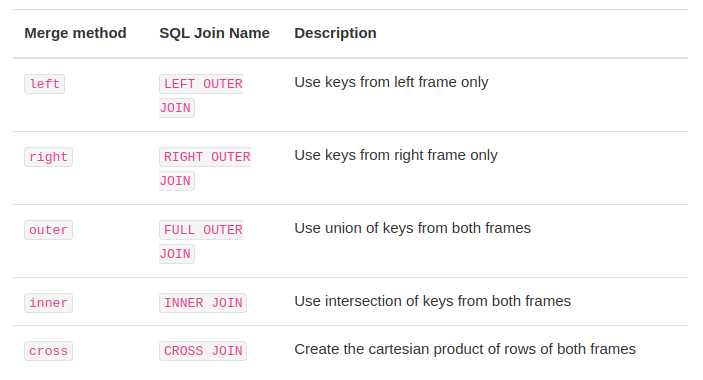

In [34]:
pd.merge(left,right, how="outer", on="key")

,key,Name,Surname,Gender
0,1,Adrian,Caneva,Male
1,0,Pablo,Rosler,NaN
2,2,Marta,Robles,Female


In [35]:
# indicator
right = pd.concat([right,pd.DataFrame({
    "key":[3],
    "Gender":["Unknown"]
})], ignore_index=True)
pd.merge(left,right, how="outer", on="key", indicator=True)

,key,Name,Surname,Gender,_merge
0,1,Adrian,Caneva,Male,both
1,0,Pablo,Rosler,NaN,left_only
2,2,Marta,Robles,Female,both
3,3,NaN,NaN,Unknown,right_only


### [Join](https://pandas.pydata.org/docs/user_guide/merging.html#joining-on-index)

```
# Equivalence
left.join(right, on=key_or_keys)
pd.merge(
    left, right, left_on=key_or_keys, right_index=True, how="left", sort=False
)
```

In [36]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)


right = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)


left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [37]:
left.join(right, how="outer")

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


## [Group by: split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

Possible steps chained:
- __Splitting__ data into groups
- __Applying__ a function to each group
- __Combining__ results into a data structure

Where applying step can action using:

- __Aggregation__ Eg. sums, means, counts
- __Transformation__ Eg. standarize data (zscore)
- __Filtration__ Eg. filter out data based on the group sum or mean

## Reshaping

### [Pivot](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects)
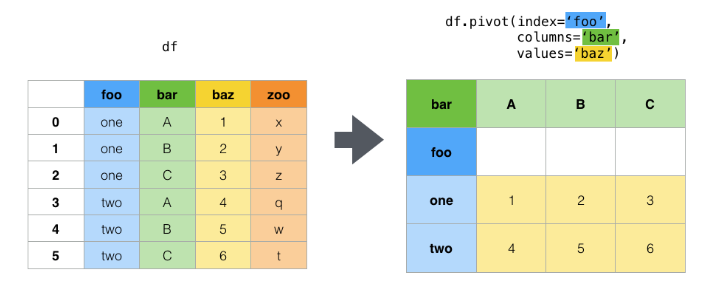

### [Melt](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt)
Transform table in key,values
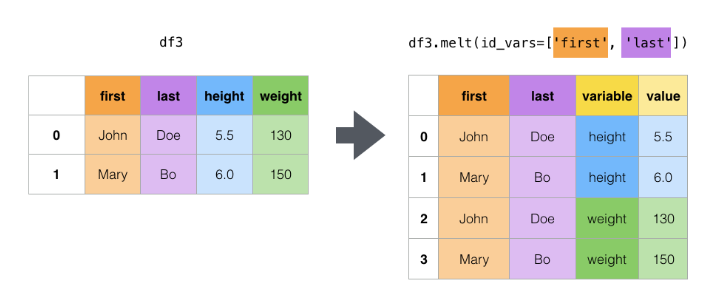